# Preprocessing Pipeline for ViT-Base-Patch16-224

Loading HAM10000 dataset...

📊 Generating Horizontal Class Distribution Graph...


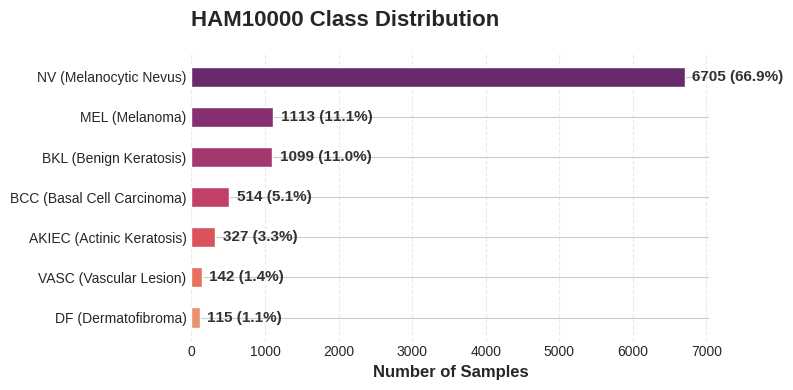


🖼️ Generating Sample Images Grid...


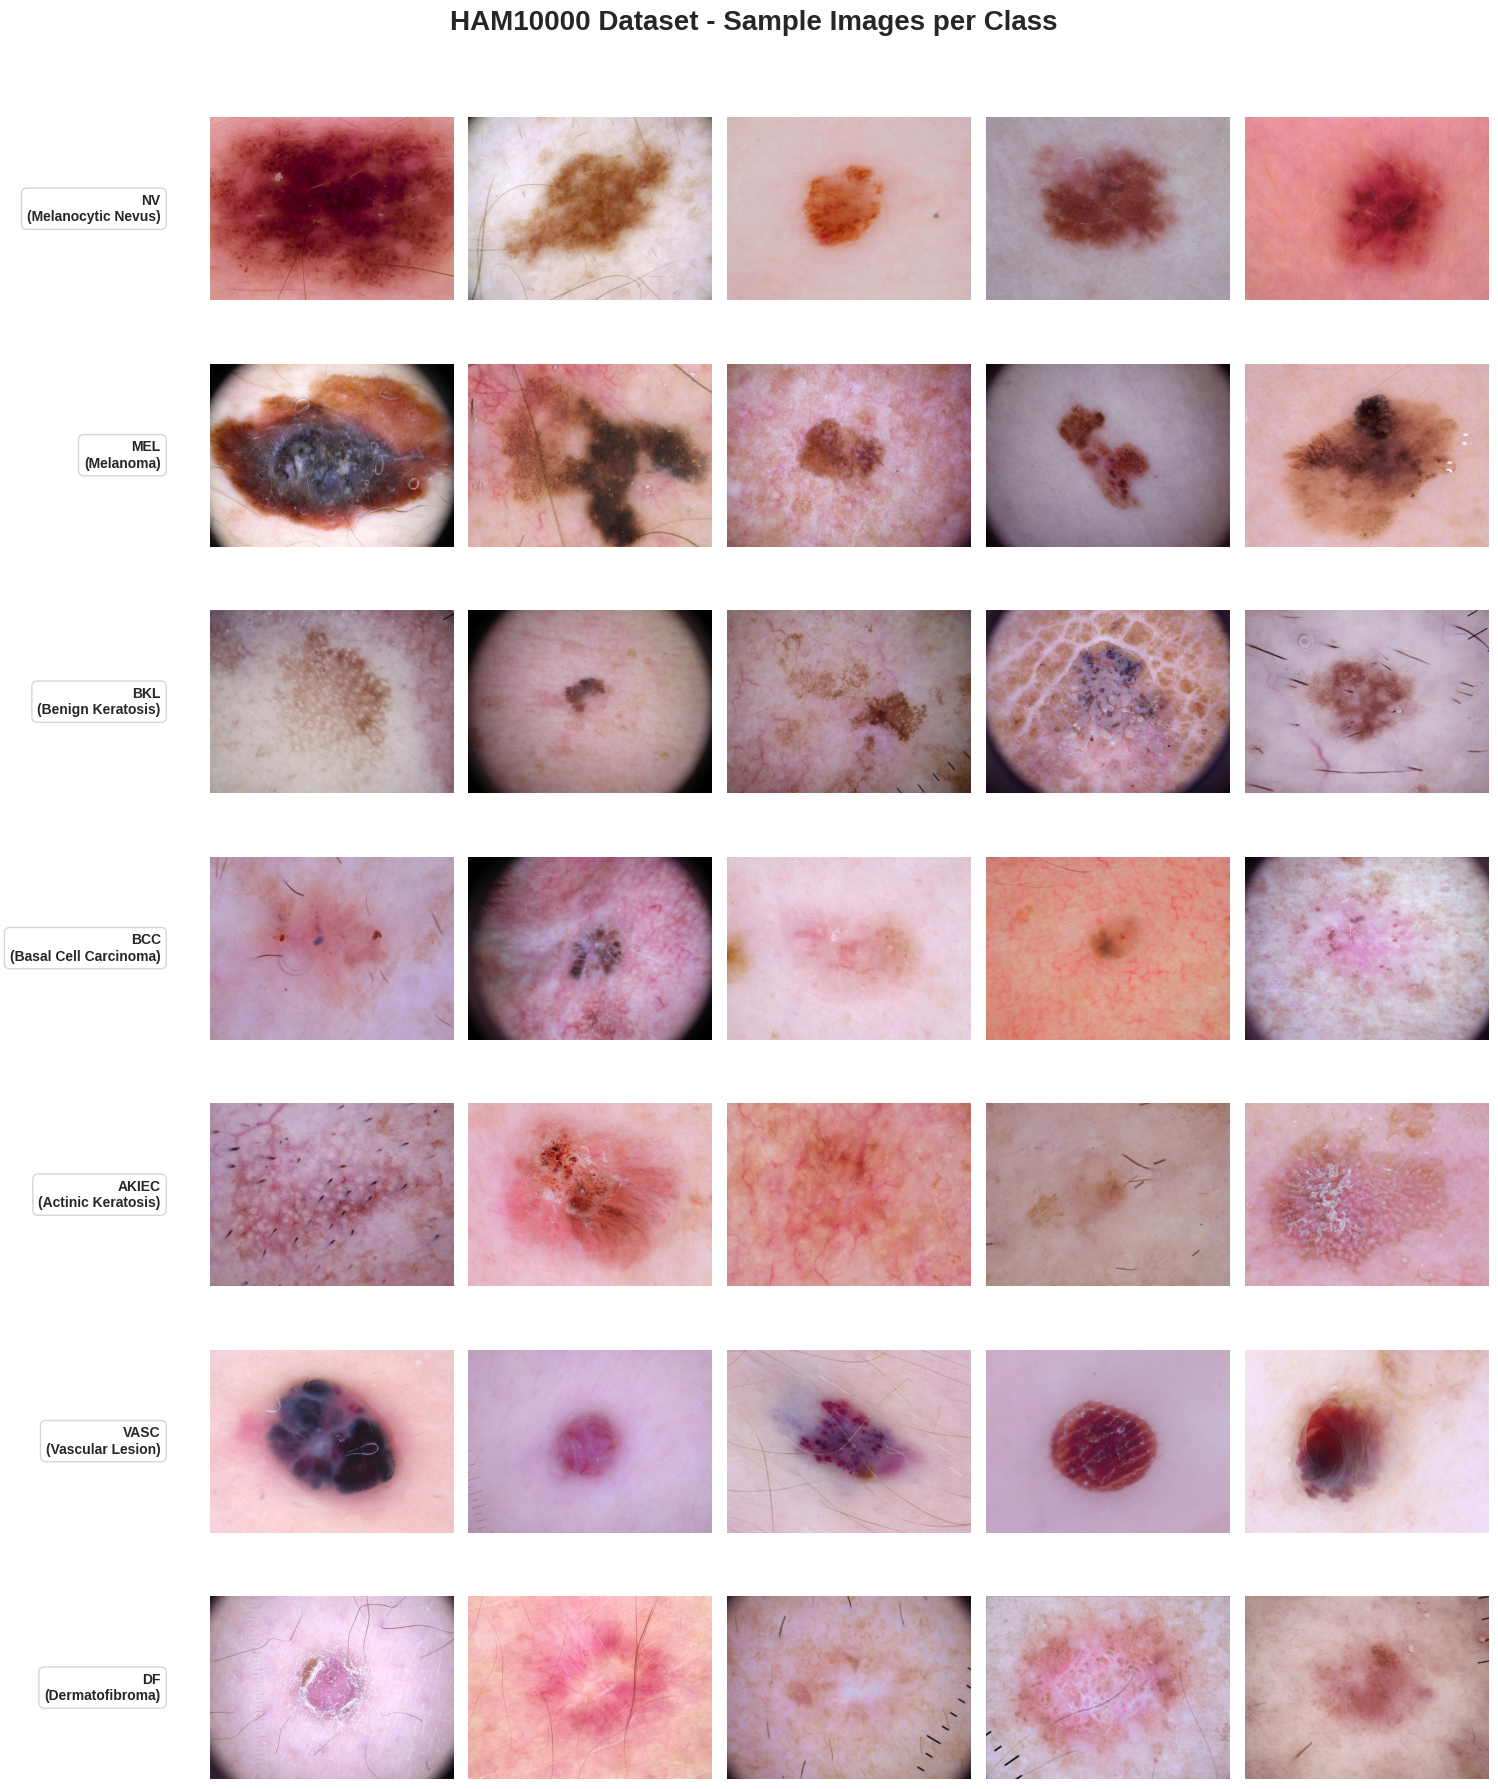


                        DATASET SUMMARY TABLE                         
Class    Full Name                 Count    Percentage   Type
----------------------------------------------------------------------
NV       Melanocytic Nevus         6705        66.95%    Benign
MEL      Melanoma                  1113        11.11%    Malignant
BKL      Benign Keratosis          1099        10.97%    Benign
BCC      Basal Cell Carcinoma      514          5.13%    Malignant
AKIEC    Actinic Keratosis         327          3.27%    Pre-malignant
VASC     Vascular Lesion           142          1.42%    Benign
DF       Dermatofibroma            115          1.15%    Benign
----------------------------------------------------------------------
TOTAL                              10015    100.00%     

📊 CLASS IMBALANCE ANALYSIS
Most Common Class:  NV (Melanocytic Nevus) - 6705 samples
Least Common Class: DF (Dermatofibroma) - 115 samples
Imbalance Ratio:    58.30x

Status: ⚠️ HIGHLY IMBALANCED


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# --- CONFIGURATION ---
IMG_DIR = '/kaggle/input/datasets/surajghuwalewala/ham1000-segmentation-and-classification/images/'
CSV_PATH = '/kaggle/input/datasets/surajghuwalewala/ham1000-segmentation-and-classification/GroundTruth.csv'

# Set Professional Style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("flare")

# =========================================================
# 1. LOAD DATASET
# =========================================================
print("Loading HAM10000 dataset...")
df = pd.read_csv(CSV_PATH)

if 'image_id' in df.columns: df = df.rename(columns={'image_id': 'image'})
label_cols = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
if 'label' not in df.columns:
    df['label'] = df[label_cols].idxmax(axis=1)

disease_names = {
    'MEL': 'Melanoma',
    'NV': 'Melanocytic Nevus', 
    'BCC': 'Basal Cell Carcinoma',
    'AKIEC': 'Actinic Keratosis',
    'BKL': 'Benign Keratosis',
    'DF': 'Dermatofibroma',
    'VASC': 'Vascular Lesion'
}

class_counts = df['label'].value_counts().sort_values(ascending=True)
total_samples = len(df)

# =========================================================
# 2. VISUALIZATION: PROFESSIONAL HORIZONTAL BAR CHART
# =========================================================
print("\n📊 Generating Horizontal Class Distribution Graph...")
plt.figure(figsize=(8, 4))

colors = sns.color_palette("flare", n_colors=len(class_counts))
bars = plt.barh(class_counts.index, class_counts.values, color=colors, edgecolor='white', height=0.5)

for bar in bars:
    width = bar.get_width()
    plt.text(width + (total_samples*0.01), bar.get_y() + bar.get_height()/2, 
             f'{int(width)} ({width/total_samples*100:.1f}%)', 
             va='center', fontsize=11, fontweight='bold', color='#333333')

plt.title('HAM10000 Class Distribution', fontsize=16, fontweight='bold', loc='left', pad=20)
plt.xlabel('Number of Samples', fontsize=12, fontweight='bold')
plt.yticks([i for i in range(len(class_counts))], 
           [f"{c} ({disease_names[c]})" for c in class_counts.index], fontsize=10)

sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('ham10000_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================================================
# 3. VISUALIZATION: SAMPLE IMAGES GRID
# =========================================================
print("\n🖼️ Generating Sample Images Grid...")
sorted_labels_desc = class_counts.index[::-1] 

fig, axes = plt.subplots(7, 5, figsize=(15, 18))
fig.suptitle('HAM10000 Dataset - Sample Images per Class', fontsize=20, fontweight='bold', y=1.01)

for row_idx, class_name in enumerate(sorted_labels_desc):
    class_df = df[df['label'] == class_name]
    sample_imgs = class_df.sample(5, random_state=42)['image'].values if len(class_df) >= 5 else class_df['image'].values
    
    for col_idx, img_name in enumerate(sample_imgs[:5]):
        ax = axes[row_idx, col_idx]
        try:
            img_path = os.path.join(IMG_DIR, f'{img_name}.jpg')
            if not os.path.exists(img_path): img_path = os.path.join(IMG_DIR, img_name)
            img = Image.open(img_path)
            ax.imshow(img)
        except:
            ax.text(0.5, 0.5, 'Not Found', ha='center', va='center', color='red')
        
        ax.axis('off')
        if col_idx == 0:
            ax.text(-0.2, 0.5, f'{class_name}\n({disease_names[class_name]})', 
                    transform=ax.transAxes, fontsize=10, fontweight='bold',
                    va='center', ha='right', bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8, edgecolor='#cccccc'))

plt.tight_layout()
plt.savefig('ham10000_sample_images.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================================================
# 4. SUMMARY TABLE
# =========================================================
print("\n" + "="*70)
print(f"{'DATASET SUMMARY TABLE':^70}")
print("="*70)
print(f"{'Class':<8} {'Full Name':<25} {'Count':<8} {'Percentage':<12} {'Type'}")
print("-" * 70)

class_types = {
    'MEL': 'Malignant', 'NV': 'Benign', 'BCC': 'Malignant',
    'AKIEC': 'Pre-malignant', 'BKL': 'Benign', 'DF': 'Benign', 'VASC': 'Benign'
}

for class_name in class_counts.index[::-1]:
    count = class_counts[class_name]
    print(f"{class_name:<8} {disease_names[class_name]:<25} {count:<8} {count/total_samples*100:>8.2f}%    {class_types[class_name]}")

print("-" * 70)
print(f"{'TOTAL':<8} {'':<25} {total_samples:<8} {'100.00%':<12}")
print("="*70)

# =========================================================
# 5. CLASS IMBALANCE ANALYSIS
# =========================================================
print("\n📊 CLASS IMBALANCE ANALYSIS")
print("="*70)
max_class = class_counts.idxmax()
min_class = class_counts.idxmin()
imbalance_ratio = class_counts[max_class] / class_counts[min_class]

print(f"Most Common Class:  {max_class} ({disease_names[max_class]}) - {class_counts[max_class]} samples")
print(f"Least Common Class: {min_class} ({disease_names[min_class]}) - {class_counts[min_class]} samples")
print(f"Imbalance Ratio:    {imbalance_ratio:.2f}x")
print(f"\nStatus: {'⚠️ HIGHLY IMBALANCED' if imbalance_ratio > 10 else 'MODERATELY IMBALANCED'}")
print("="*70)

In [2]:
!pip install codecarbon -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.6/359.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 7.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.22.1 requires google-cloud-bigquery-storage>=2.0.0, which is not installed.
google-genai 1.57.0 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.2 which is incompatible.
a2a-sdk 0.3.22 requires httpx>=0.28.1, but you have httpx 0.27.2 which is incompatible.
gradio 5.49.1 requires pydantic<2.12,>=2.0, but you have pydantic 2.12.5 which is incompatible.
firebase-admin 6.9.0 requires httpx[http2]==0.28.1, but y

In [3]:
import os
import logging

logging.getLogger("codecarbon").disabled = True
logging.getLogger("codecarbon").setLevel(logging.CRITICAL)

import random
import gc
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.cuda.amp import autocast, GradScaler
import timm
from timm.loss import SoftTargetCrossEntropy
from timm.data import Mixup
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import pickle
import time
from codecarbon import EmissionsTracker
import warnings
from warnings import simplefilter
simplefilter("ignore", category=FutureWarning)
simplefilter("ignore", category=UserWarning)

# ============================================================
# CONFIG  (ViT-Base, stable LR, 20 epochs)
# ============================================================
SEED          = 42
DATA_DIR      = "/kaggle/input/datasets/surajghuwalewala/ham1000-segmentation-and-classification"
IMG_DIR       = os.path.join(DATA_DIR, "images")
META_CSV      = os.path.join(DATA_DIR, "GroundTruth.csv")
OUT_DIR       = "output"
os.makedirs(OUT_DIR, exist_ok=True)

MODEL_NAME    = "vit_base_patch16_224"   # ✅ Base model (stable)
PRETRAINED    = True
IMG_SIZE      = 224
BATCH_SIZE    = 24
EPOCHS        = 20
LR            = 2e-5                     # ✅ Safe LR (nan loss ছিল 3e-4 এ)
WEIGHT_DECAY  = 5e-3
NUM_FOLDS     = 10
PATIENCE      = 7
DEVICE        = "cuda" if torch.cuda.is_available() else "cpu"

USE_MIXUP              = True
MIXUP_ALPHA            = 0.2
MIXUP_PROB             = 0.5
CLIP_GRAD_NORM         = 1.0
FREEZE_BACKBONE_EPOCHS = 2
DROP_LAST              = True
NUM_WORKERS            = 2

print(f"✅ Model : {MODEL_NAME}")
print(f"✅ Device: {DEVICE}")
print(f"✅ Epochs: {EPOCHS}  |  LR: {LR}  |  Batch: {BATCH_SIZE}")

# ============================================================
# UTILITIES
# ============================================================
def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if DEVICE.startswith("cuda"):
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark     = False

seed_everything()
DL_GENERATOR = torch.Generator()
DL_GENERATOR.manual_seed(SEED)

# ============================================================
# DATA
# ============================================================
def read_metadata(meta_csv):
    df = pd.read_csv(meta_csv)
    label_columns = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

    if all(col in df.columns for col in label_columns):
        print("✅ One-hot labels detected → converting to single label...")
        df['label'] = df[label_columns].idxmax(axis=1)
        img_col = 'image_id' if 'image_id' in df.columns else ('image' if 'image' in df.columns else df.columns[0])
        df = df[[img_col, 'label']].rename(columns={img_col: 'image'})
    else:
        label_col = 'dx' if 'dx' in df.columns else ('label' if 'label' in df.columns else df.columns[1])
        img_col   = 'image_id' if 'image_id' in df.columns else ('image' if 'image' in df.columns else df.columns[0])
        df = df[[img_col, label_col]].rename(columns={img_col: 'image', label_col: 'label'})

    df['image_path'] = df['image'].apply(
        lambda x: os.path.join(IMG_DIR, str(x)) if str(x).endswith(('.jpg','.png','.jpeg'))
                  else os.path.join(IMG_DIR, f"{x}.jpg")
    )
    return df


class HAM10000Dataset(Dataset):
    def __init__(self, df, transforms=None):
        self.df         = df.reset_index(drop=True)
        self.transforms = transforms

    def __len__(self): return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        try:
            img = Image.open(row['image_path']).convert("RGB")
        except:
            img = Image.new("RGB", (IMG_SIZE, IMG_SIZE))
        img   = np.ascontiguousarray(np.array(img.resize((IMG_SIZE, IMG_SIZE))))
        label = int(row['label_idx'])
        if self.transforms:
            img = self.transforms(image=img)['image']
        return img, label


def get_transforms(train=True):
    if train:
        return A.Compose([
            A.RandomResizedCrop(size=(IMG_SIZE, IMG_SIZE), scale=(0.7, 1.0), ratio=(0.9, 1.1)),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.1),
            A.RandomRotate90(p=0.2),
            A.Affine(translate_percent=0.03, scale=(0.9, 1.1), rotate=(-15, 15), p=0.3),
            A.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.05, p=0.3),
            A.RandomGamma(p=0.2),
            A.GaussianBlur(blur_limit=(3, 5), p=0.15),
            A.ElasticTransform(p=0.1, alpha=20, sigma=3),
            A.CoarseDropout(max_holes=5, max_height=IMG_SIZE//15, max_width=IMG_SIZE//15, p=0.3),
            A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
            ToTensorV2(),
        ])
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),
        A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2(),
    ])

# ============================================================
# MODEL
# ============================================================
class ViTClassifier(nn.Module):
    def __init__(self, model_name=MODEL_NAME, num_classes=7, pretrained=PRETRAINED):
        super().__init__()
        self.net    = timm.create_model(model_name, pretrained=pretrained, num_classes=0)
        in_features = self.net.num_features
        self.net.head = nn.Sequential(nn.Dropout(0.5), nn.Linear(in_features, num_classes))

    def forward(self, x):
        return self.net(x)


def get_mixup_fn(num_classes):
    return Mixup(mixup_alpha=MIXUP_ALPHA, cutmix_alpha=1.0, prob=MIXUP_PROB,
                 switch_prob=0.5, mode='batch', label_smoothing=0.05, num_classes=num_classes)

# ============================================================
# EMA
# ============================================================
class ModelEMA:
    def __init__(self, model, num_classes):
        self.num_classes = num_classes
        self.decay       = 0.995
        self.ema_model   = self._clone(model)

    def _clone(self, model):
        ema = ViTClassifier(num_classes=self.num_classes, pretrained=False)
        ema.load_state_dict(model.state_dict())
        for p in ema.parameters():
            p.requires_grad = False
        return ema

    def update(self, model):
        with torch.no_grad():
            for (k, v), src in zip(self.ema_model.state_dict().items(),
                                   model.state_dict().values()):
                v.copy_(v * self.decay + src.to(v.device) * (1.0 - self.decay))

    def state_dict(self):
        return self.ema_model.state_dict()

# ============================================================
# TRAIN / VALIDATE
# ============================================================
scaler = GradScaler(enabled=(DEVICE == "cuda"))

def set_backbone_grad(model, requires_grad):
    for name, p in model.named_parameters():
        p.requires_grad = True if 'head' in name else requires_grad


def train_one_epoch(model, loader, criterion, optimizer, scheduler, device, mixup_fn, ema):
    model.train()
    losses, all_targs, all_preds, lats = [], [], [], []
    t0 = time.time()

    for imgs, labels in tqdm(loader, leave=False):
        t_b = time.time()
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()

        with autocast(enabled=(device == "cuda")):
            if mixup_fn and imgs.size(0) % 2 == 0:
                imgs, labels = mixup_fn(imgs, labels)
            out  = model(imgs)
            loss = criterion(out, labels)

        scaler.scale(loss).backward()
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), CLIP_GRAD_NORM)
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()
        if ema: ema.update(model)

        lats.append(time.time() - t_b)
        losses.append(loss.item())

        lnp = labels.detach().cpu().numpy()
        if lnp.ndim > 1: lnp = lnp.argmax(1)
        all_targs.extend(lnp)
        all_preds.extend(out.argmax(1).detach().cpu().numpy())

    acc = accuracy_score(all_targs, all_preds) if all_targs else 0.0
    return np.nanmean(losses), acc, time.time() - t0


@torch.no_grad()
def validate(model, loader, device):
    model.eval()
    losses, preds, targs = [], [], []
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        with autocast(enabled=(device == "cuda")):
            out  = model(imgs)
            loss = F.cross_entropy(out, labels)
        losses.append(loss.item())
        targs.extend(labels.cpu().numpy())
        preds.extend(out.argmax(1).cpu().numpy())
    acc = accuracy_score(targs, preds)
    bal = balanced_accuracy_score(targs, preds)
    f1  = f1_score(targs, preds, average='macro', zero_division=0)
    return np.mean(losses), acc, bal, f1

# ============================================================
# MAIN
# ============================================================
from torch.optim.lr_scheduler import CosineAnnealingLR

def run_training():
    df = read_metadata(META_CSV)
    labels    = sorted(df['label'].unique())
    label_map = {k: i for i, k in enumerate(labels)}
    df['label_idx'] = df['label'].map(label_map)
    NUM_CLASSES = len(labels)

    print("\n" + "="*60)
    print("📋 DATASET INFORMATION")
    print("="*60)
    print(f"Total samples : {len(df)}")
    print(f"Num classes   : {NUM_CLASSES}")
    print(f"Classes       : {labels}")
    print("\nClass distribution:")
    print(df['label'].value_counts().sort_index())
    print("="*60 + "\n")

    skf             = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEED)
    fold_results    = []
    global_best_bal = 0.0
    best_fold_idx   = -1
    best_model_path = None
    all_latencies   = []

    tracker = EmissionsTracker(measure_power_secs=15, save_to_file=False)
    tracker.start()

    for fold, (tr_idx, val_idx) in enumerate(skf.split(df['image'], df['label']), 1):
        print(f"\n{'='*60}")
        print(f"  Fold {fold}/{NUM_FOLDS}")
        print(f"{'='*60}")

        train_df = df.iloc[tr_idx].reset_index(drop=True)
        val_df   = df.iloc[val_idx].reset_index(drop=True)

        # Weighted sampler for class imbalance
        counts         = train_df['label_idx'].value_counts().sort_index().values
        cls_w          = 1.0 / (counts + 1e-6)
        sample_w       = train_df['label_idx'].map(lambda x: cls_w[x]).values
        sampler        = WeightedRandomSampler(sample_w, len(sample_w), replacement=True)

        train_loader = DataLoader(
            HAM10000Dataset(train_df, get_transforms(True)),
            batch_size=BATCH_SIZE, sampler=sampler, num_workers=NUM_WORKERS,
            pin_memory=True, drop_last=DROP_LAST, generator=DL_GENERATOR)

        val_loader = DataLoader(
            HAM10000Dataset(val_df, get_transforms(False)),
            batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

        model    = ViTClassifier(num_classes=NUM_CLASSES).to(DEVICE)
        set_backbone_grad(model, requires_grad=False)

        mixup_fn  = get_mixup_fn(NUM_CLASSES) if USE_MIXUP else None
        criterion = SoftTargetCrossEntropy() if USE_MIXUP else nn.CrossEntropyLoss(label_smoothing=0.1)
        optimizer = torch.optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=LR, weight_decay=WEIGHT_DECAY)

        # CosineAnnealingLR steps every batch
        total_steps = len(train_loader) * EPOCHS
        scheduler   = CosineAnnealingLR(optimizer, T_max=total_steps, eta_min=1e-7)

        ema           = ModelEMA(model, NUM_CLASSES)
        best_val_bal  = 0.0
        best_val_acc  = best_val_f1 = best_val_loss = 0.0
        best_tr_loss  = best_tr_acc = 0.0
        patience_cnt  = 0
        epoch_logs    = []

        for epoch in range(1, EPOCHS + 1):
            if epoch == FREEZE_BACKBONE_EPOCHS + 1:
                set_backbone_grad(model, requires_grad=True)
                optimizer = torch.optim.AdamW(model.parameters(), lr=LR * 0.5, weight_decay=WEIGHT_DECAY)
                scheduler = CosineAnnealingLR(optimizer, T_max=(EPOCHS - epoch + 1) * len(train_loader), eta_min=1e-7)
                print(f"  🔓 Backbone unfrozen at epoch {epoch}")

            tr_loss, tr_acc, lat = train_one_epoch(
                model, train_loader, criterion, optimizer, scheduler, DEVICE, mixup_fn, ema)
            all_latencies.append(lat)

            val_loss, val_acc, val_bal, val_f1 = validate(ema.ema_model.to(DEVICE), val_loader, DEVICE)

            print(f"  Ep {epoch:2d}/{EPOCHS} | tr_loss {tr_loss:.4f} | tr_acc {tr_acc:.4f} "
                  f"| val_loss {val_loss:.4f} | val_acc {val_acc:.4f} | bal {val_bal:.4f} | f1 {val_f1:.4f}")

            epoch_logs.append(dict(epoch=epoch, train_loss=tr_loss, train_acc=tr_acc,
                                   val_loss=val_loss, val_acc=val_acc, val_bal=val_bal, val_f1=val_f1))

            if val_bal > best_val_bal + 1e-6:
                best_val_bal, best_val_acc, best_val_f1 = val_bal, val_acc, val_f1
                best_val_loss, best_tr_loss, best_tr_acc = val_loss, tr_loss, tr_acc
                torch.save(ema.state_dict(), os.path.join(OUT_DIR, f"best_fold{fold}_ema.pth"))
                patience_cnt = 0
            else:
                patience_cnt += 1
                if patience_cnt >= PATIENCE:
                    print(f"  ⏸  Early stopping at epoch {epoch}")
                    break

        fold_results.append(dict(
            fold=fold,
            best_val_loss=best_val_loss, best_val_acc=best_val_acc,
            best_val_bal=best_val_bal,  best_val_f1=best_val_f1,
            best_train_loss=best_tr_loss, best_train_acc=best_tr_acc,
            best_model_path=os.path.join(OUT_DIR, f"best_fold{fold}_ema.pth"),
            epoch_logs=epoch_logs))

        if best_val_bal > global_best_bal:
            global_best_bal = best_val_bal
            best_fold_idx   = fold
            best_model_path = os.path.join(OUT_DIR, f"best_fold{fold}_ema.pth")

        del model, ema, optimizer, scheduler
        torch.cuda.empty_cache(); gc.collect()

    # ── Energy & latency ──────────────────────────────────────
    tracker.stop()
    total_kwh = tracker.final_emissions_data.energy_consumed
    total_kj  = total_kwh * 3600
    total_lat = sum(all_latencies)

    results_dict = dict(
        fold_results=fold_results,
        best_fold_idx=best_fold_idx,
        best_balanced_acc=global_best_bal,
        best_model_path=best_model_path,
        total_energy_kwh=total_kwh,
        total_latency_all_folds=total_lat,
        num_classes=NUM_CLASSES,
        class_names=labels,
        model_name=MODEL_NAME,          # ✅ model name save করা হচ্ছে
    )
    with open(os.path.join(OUT_DIR, "fold_results.pkl"), "wb") as f:
        pickle.dump(results_dict, f)

    bm = fold_results[best_fold_idx - 1]
    print("\n" + "="*60)
    print("⚡ EFFICIENCY REPORT")
    print("="*60)
    print(f"Total Latency        : {total_lat:.2f} sec")
    print(f"Avg Latency / Fold   : {total_lat/NUM_FOLDS:.2f} sec")
    print(f"Total Energy         : {total_kj:.2f} kJ  ({total_kwh:.6f} kWh)")
    print(f"Avg Energy / Fold    : {total_kj/NUM_FOLDS:.4f} kJ")
    print("="*60)
    print(f"\n🏆 Best Fold : {best_fold_idx}")
    print(f"   Train Loss : {bm['best_train_loss']:.4f}  |  Train Acc : {bm['best_train_acc']:.4f}")
    print(f"   Val   Loss : {bm['best_val_loss']:.4f}  |  Val   Acc : {bm['best_val_acc']:.4f}")
    print(f"   Balanced   : {bm['best_val_bal']:.4f}  |  F1        : {bm['best_val_f1']:.4f}")
    print(f"\n✅ Classes : {labels}")
    print(f"✅ Model   : {best_model_path}")
    print("="*60)


if __name__ == "__main__":
    run_training()

/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

✅ Model : vit_base_patch16_224
✅ Device: cuda
✅ Epochs: 20  |  LR: 2e-05  |  Batch: 24
✅ One-hot labels detected → converting to single label...

📋 DATASET INFORMATION
Total samples : 10015
Num classes   : 7
Classes       : ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']

Class distribution:
label
AKIEC     327
BCC       514
BKL      1099
DF        115
MEL      1113
NV       6705
VASC      142
Name: count, dtype: int64


  Fold 1/10


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

  Ep  1/20 | tr_loss 2.1706 | tr_acc 0.1816 | val_loss 1.7589 | val_acc 0.3383 | bal 0.2483 | f1 0.1852


  Ep  2/20 | tr_loss 2.0029 | tr_acc 0.2372 | val_loss 1.6688 | val_acc 0.4162 | bal 0.3830 | f1 0.2522
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1548 | tr_acc 0.6539 | val_loss 0.7109 | val_acc 0.7435 | bal 0.7858 | f1 0.6679


  Ep  4/20 | tr_loss 0.8922 | tr_acc 0.7803 | val_loss 0.5683 | val_acc 0.7864 | bal 0.8511 | f1 0.7500


  Ep  5/20 | tr_loss 0.7773 | tr_acc 0.8322 | val_loss 0.4760 | val_acc 0.8234 | bal 0.8551 | f1 0.7777


  Ep  6/20 | tr_loss 0.7180 | tr_acc 0.8538 | val_loss 0.4324 | val_acc 0.8483 | bal 0.8887 | f1 0.8260


  Ep  7/20 | tr_loss 0.6796 | tr_acc 0.8714 | val_loss 0.4208 | val_acc 0.8493 | bal 0.8733 | f1 0.8313


  Ep  8/20 | tr_loss 0.6560 | tr_acc 0.8786 | val_loss 0.4066 | val_acc 0.8483 | bal 0.8710 | f1 0.8321


  Ep  9/20 | tr_loss 0.6009 | tr_acc 0.9119 | val_loss 0.3790 | val_acc 0.8673 | bal 0.8804 | f1 0.8449


  Ep 10/20 | tr_loss 0.6165 | tr_acc 0.9044 | val_loss 0.3758 | val_acc 0.8743 | bal 0.8837 | f1 0.8494


  Ep 11/20 | tr_loss 0.6024 | tr_acc 0.9089 | val_loss 0.3527 | val_acc 0.8842 | bal 0.8979 | f1 0.8710


  Ep 12/20 | tr_loss 0.5785 | tr_acc 0.9172 | val_loss 0.3476 | val_acc 0.8882 | bal 0.8860 | f1 0.8662


  Ep 13/20 | tr_loss 0.5558 | tr_acc 0.9256 | val_loss 0.3403 | val_acc 0.8932 | bal 0.8842 | f1 0.8666


  Ep 14/20 | tr_loss 0.5023 | tr_acc 0.9403 | val_loss 0.3300 | val_acc 0.8982 | bal 0.8949 | f1 0.8766


  Ep 15/20 | tr_loss 0.5843 | tr_acc 0.9242 | val_loss 0.3227 | val_acc 0.8982 | bal 0.8885 | f1 0.8733


  Ep 16/20 | tr_loss 0.5178 | tr_acc 0.9410 | val_loss 0.3305 | val_acc 0.9012 | bal 0.8892 | f1 0.8655


  Ep 17/20 | tr_loss 0.5711 | tr_acc 0.9289 | val_loss 0.3327 | val_acc 0.9002 | bal 0.8850 | f1 0.8641


  Ep 18/20 | tr_loss 0.5203 | tr_acc 0.9433 | val_loss 0.3239 | val_acc 0.9032 | bal 0.8877 | f1 0.8691
  ⏸  Early stopping at epoch 18

  Fold 2/10


  Ep  1/20 | tr_loss 2.2284 | tr_acc 0.1577 | val_loss 2.0167 | val_acc 0.1218 | bal 0.1973 | f1 0.0959


  Ep  2/20 | tr_loss 2.0466 | tr_acc 0.2142 | val_loss 1.7695 | val_acc 0.3204 | bal 0.3285 | f1 0.1919
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1913 | tr_acc 0.6279 | val_loss 0.6749 | val_acc 0.7635 | bal 0.7990 | f1 0.6833


  Ep  4/20 | tr_loss 0.8442 | tr_acc 0.7976 | val_loss 0.5317 | val_acc 0.7974 | bal 0.8544 | f1 0.7687


  Ep  5/20 | tr_loss 0.7327 | tr_acc 0.8462 | val_loss 0.4830 | val_acc 0.8234 | bal 0.8793 | f1 0.7975


  Ep  6/20 | tr_loss 0.7370 | tr_acc 0.8496 | val_loss 0.4320 | val_acc 0.8473 | bal 0.8968 | f1 0.8293


  Ep  7/20 | tr_loss 0.6688 | tr_acc 0.8732 | val_loss 0.4044 | val_acc 0.8563 | bal 0.9066 | f1 0.8457


  Ep  8/20 | tr_loss 0.6389 | tr_acc 0.8930 | val_loss 0.3893 | val_acc 0.8603 | bal 0.9181 | f1 0.8524


  Ep  9/20 | tr_loss 0.6345 | tr_acc 0.8953 | val_loss 0.3577 | val_acc 0.8743 | bal 0.9116 | f1 0.8661


  Ep 10/20 | tr_loss 0.6024 | tr_acc 0.9074 | val_loss 0.3516 | val_acc 0.8812 | bal 0.9192 | f1 0.8815


  Ep 11/20 | tr_loss 0.5644 | tr_acc 0.9222 | val_loss 0.3660 | val_acc 0.8762 | bal 0.9095 | f1 0.8688


  Ep 12/20 | tr_loss 0.5813 | tr_acc 0.9171 | val_loss 0.3174 | val_acc 0.9022 | bal 0.9147 | f1 0.8936


  Ep 13/20 | tr_loss 0.5712 | tr_acc 0.9211 | val_loss 0.3280 | val_acc 0.8972 | bal 0.9208 | f1 0.8918


  Ep 14/20 | tr_loss 0.5847 | tr_acc 0.9248 | val_loss 0.3112 | val_acc 0.9052 | bal 0.9214 | f1 0.8986


  Ep 15/20 | tr_loss 0.5254 | tr_acc 0.9341 | val_loss 0.3056 | val_acc 0.9082 | bal 0.9150 | f1 0.9013


  Ep 16/20 | tr_loss 0.5247 | tr_acc 0.9329 | val_loss 0.3097 | val_acc 0.9082 | bal 0.9125 | f1 0.9011


  Ep 17/20 | tr_loss 0.5369 | tr_acc 0.9437 | val_loss 0.3025 | val_acc 0.9112 | bal 0.9249 | f1 0.9085


  Ep 18/20 | tr_loss 0.5108 | tr_acc 0.9441 | val_loss 0.3013 | val_acc 0.9132 | bal 0.9274 | f1 0.9105


  Ep 19/20 | tr_loss 0.5296 | tr_acc 0.9419 | val_loss 0.3067 | val_acc 0.9102 | bal 0.9257 | f1 0.9086


  Ep 20/20 | tr_loss 0.5427 | tr_acc 0.9418 | val_loss 0.2994 | val_acc 0.9132 | bal 0.9264 | f1 0.9060

  Fold 3/10


  Ep  1/20 | tr_loss 2.2175 | tr_acc 0.1630 | val_loss 1.9693 | val_acc 0.1707 | bal 0.2031 | f1 0.1103


  Ep  2/20 | tr_loss 2.0348 | tr_acc 0.2179 | val_loss 1.7599 | val_acc 0.3263 | bal 0.3386 | f1 0.1988
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1690 | tr_acc 0.6443 | val_loss 0.7030 | val_acc 0.7515 | bal 0.7725 | f1 0.6578


  Ep  4/20 | tr_loss 0.8537 | tr_acc 0.7901 | val_loss 0.5496 | val_acc 0.7854 | bal 0.8270 | f1 0.7329


  Ep  5/20 | tr_loss 0.7827 | tr_acc 0.8264 | val_loss 0.4853 | val_acc 0.8134 | bal 0.8412 | f1 0.7721


  Ep  6/20 | tr_loss 0.6890 | tr_acc 0.8713 | val_loss 0.4555 | val_acc 0.8224 | bal 0.8376 | f1 0.7757


  Ep  7/20 | tr_loss 0.6688 | tr_acc 0.8744 | val_loss 0.4207 | val_acc 0.8543 | bal 0.8581 | f1 0.8021


  Ep  8/20 | tr_loss 0.6391 | tr_acc 0.8822 | val_loss 0.3995 | val_acc 0.8693 | bal 0.8792 | f1 0.8233


  Ep  9/20 | tr_loss 0.6088 | tr_acc 0.8962 | val_loss 0.4152 | val_acc 0.8473 | bal 0.8679 | f1 0.8087


  Ep 10/20 | tr_loss 0.6284 | tr_acc 0.9001 | val_loss 0.3891 | val_acc 0.8743 | bal 0.8754 | f1 0.8299


  Ep 11/20 | tr_loss 0.6070 | tr_acc 0.9142 | val_loss 0.3586 | val_acc 0.8862 | bal 0.8708 | f1 0.8396


  Ep 12/20 | tr_loss 0.5607 | tr_acc 0.9260 | val_loss 0.3530 | val_acc 0.8882 | bal 0.8799 | f1 0.8488


  Ep 13/20 | tr_loss 0.5493 | tr_acc 0.9312 | val_loss 0.3505 | val_acc 0.8912 | bal 0.8868 | f1 0.8541


  Ep 14/20 | tr_loss 0.5454 | tr_acc 0.9363 | val_loss 0.3479 | val_acc 0.8992 | bal 0.8885 | f1 0.8642


  Ep 15/20 | tr_loss 0.5682 | tr_acc 0.9322 | val_loss 0.3366 | val_acc 0.8972 | bal 0.8880 | f1 0.8652


  Ep 16/20 | tr_loss 0.5239 | tr_acc 0.9346 | val_loss 0.3198 | val_acc 0.9062 | bal 0.8878 | f1 0.8692


  Ep 17/20 | tr_loss 0.5181 | tr_acc 0.9463 | val_loss 0.3293 | val_acc 0.9062 | bal 0.8878 | f1 0.8698


  Ep 18/20 | tr_loss 0.4782 | tr_acc 0.9448 | val_loss 0.3277 | val_acc 0.9082 | bal 0.8913 | f1 0.8737


  Ep 19/20 | tr_loss 0.5134 | tr_acc 0.9410 | val_loss 0.3257 | val_acc 0.9062 | bal 0.8887 | f1 0.8705


  Ep 20/20 | tr_loss 0.4929 | tr_acc 0.9560 | val_loss 0.3207 | val_acc 0.9082 | bal 0.8881 | f1 0.8726

  Fold 4/10


  Ep  1/20 | tr_loss 2.2525 | tr_acc 0.1542 | val_loss 2.0322 | val_acc 0.1248 | bal 0.1694 | f1 0.0998


  Ep  2/20 | tr_loss 2.0627 | tr_acc 0.2111 | val_loss 1.8376 | val_acc 0.2565 | bal 0.2810 | f1 0.1748
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1792 | tr_acc 0.6430 | val_loss 0.7322 | val_acc 0.7395 | bal 0.7846 | f1 0.6765


  Ep  4/20 | tr_loss 0.8522 | tr_acc 0.7924 | val_loss 0.5624 | val_acc 0.7774 | bal 0.8311 | f1 0.7636


  Ep  5/20 | tr_loss 0.7970 | tr_acc 0.8267 | val_loss 0.4849 | val_acc 0.8244 | bal 0.8529 | f1 0.7953


  Ep  6/20 | tr_loss 0.7502 | tr_acc 0.8387 | val_loss 0.4622 | val_acc 0.8283 | bal 0.8593 | f1 0.8060


  Ep  7/20 | tr_loss 0.6703 | tr_acc 0.8710 | val_loss 0.4314 | val_acc 0.8453 | bal 0.8607 | f1 0.8223


  Ep  8/20 | tr_loss 0.6212 | tr_acc 0.8954 | val_loss 0.3930 | val_acc 0.8563 | bal 0.8616 | f1 0.8390


  Ep  9/20 | tr_loss 0.6033 | tr_acc 0.8917 | val_loss 0.3823 | val_acc 0.8573 | bal 0.8609 | f1 0.8360


  Ep 10/20 | tr_loss 0.5811 | tr_acc 0.9080 | val_loss 0.3564 | val_acc 0.8782 | bal 0.8719 | f1 0.8548


  Ep 11/20 | tr_loss 0.5806 | tr_acc 0.9158 | val_loss 0.3641 | val_acc 0.8782 | bal 0.8745 | f1 0.8569


  Ep 12/20 | tr_loss 0.5615 | tr_acc 0.9226 | val_loss 0.3492 | val_acc 0.8802 | bal 0.8836 | f1 0.8727


  Ep 13/20 | tr_loss 0.5356 | tr_acc 0.9299 | val_loss 0.3384 | val_acc 0.8782 | bal 0.8836 | f1 0.8647


  Ep 14/20 | tr_loss 0.5248 | tr_acc 0.9389 | val_loss 0.3407 | val_acc 0.8922 | bal 0.8927 | f1 0.8758


  Ep 15/20 | tr_loss 0.5323 | tr_acc 0.9381 | val_loss 0.3308 | val_acc 0.8942 | bal 0.8814 | f1 0.8742


  Ep 16/20 | tr_loss 0.5223 | tr_acc 0.9391 | val_loss 0.3306 | val_acc 0.8992 | bal 0.8859 | f1 0.8785


  Ep 17/20 | tr_loss 0.4955 | tr_acc 0.9439 | val_loss 0.3229 | val_acc 0.8992 | bal 0.8885 | f1 0.8772


  Ep 18/20 | tr_loss 0.5368 | tr_acc 0.9401 | val_loss 0.3324 | val_acc 0.8962 | bal 0.8857 | f1 0.8747


  Ep 19/20 | tr_loss 0.5024 | tr_acc 0.9498 | val_loss 0.3249 | val_acc 0.8962 | bal 0.8862 | f1 0.8770


  Ep 20/20 | tr_loss 0.5150 | tr_acc 0.9407 | val_loss 0.3256 | val_acc 0.8962 | bal 0.8873 | f1 0.8769

  Fold 5/10


  Ep  1/20 | tr_loss 2.2331 | tr_acc 0.1646 | val_loss 2.0824 | val_acc 0.0609 | bal 0.1649 | f1 0.0644


  Ep  2/20 | tr_loss 2.0458 | tr_acc 0.2156 | val_loss 1.8574 | val_acc 0.2086 | bal 0.2719 | f1 0.1726
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1774 | tr_acc 0.6367 | val_loss 0.7423 | val_acc 0.7216 | bal 0.8104 | f1 0.6833


  Ep  4/20 | tr_loss 0.8489 | tr_acc 0.7950 | val_loss 0.5567 | val_acc 0.7635 | bal 0.8254 | f1 0.7459


  Ep  5/20 | tr_loss 0.7772 | tr_acc 0.8330 | val_loss 0.5058 | val_acc 0.7984 | bal 0.8522 | f1 0.7941


  Ep  6/20 | tr_loss 0.7184 | tr_acc 0.8629 | val_loss 0.4811 | val_acc 0.8184 | bal 0.8698 | f1 0.8135


  Ep  7/20 | tr_loss 0.6995 | tr_acc 0.8652 | val_loss 0.4436 | val_acc 0.8403 | bal 0.8883 | f1 0.8291


  Ep  8/20 | tr_loss 0.6450 | tr_acc 0.8817 | val_loss 0.4087 | val_acc 0.8523 | bal 0.8794 | f1 0.8319


  Ep  9/20 | tr_loss 0.6187 | tr_acc 0.8939 | val_loss 0.4368 | val_acc 0.8443 | bal 0.8818 | f1 0.8359


  Ep 10/20 | tr_loss 0.5865 | tr_acc 0.9127 | val_loss 0.4038 | val_acc 0.8633 | bal 0.8800 | f1 0.8445


  Ep 11/20 | tr_loss 0.6063 | tr_acc 0.9098 | val_loss 0.4020 | val_acc 0.8603 | bal 0.8733 | f1 0.8403


  Ep 12/20 | tr_loss 0.5680 | tr_acc 0.9157 | val_loss 0.3873 | val_acc 0.8752 | bal 0.8864 | f1 0.8550


  Ep 13/20 | tr_loss 0.5365 | tr_acc 0.9333 | val_loss 0.3804 | val_acc 0.8852 | bal 0.8812 | f1 0.8565


  Ep 14/20 | tr_loss 0.5597 | tr_acc 0.9241 | val_loss 0.3727 | val_acc 0.8902 | bal 0.8998 | f1 0.8702


  Ep 15/20 | tr_loss 0.5403 | tr_acc 0.9309 | val_loss 0.3700 | val_acc 0.8912 | bal 0.8846 | f1 0.8623


  Ep 16/20 | tr_loss 0.5376 | tr_acc 0.9364 | val_loss 0.3659 | val_acc 0.8872 | bal 0.8743 | f1 0.8556


  Ep 17/20 | tr_loss 0.5363 | tr_acc 0.9288 | val_loss 0.3662 | val_acc 0.8912 | bal 0.8825 | f1 0.8599


  Ep 18/20 | tr_loss 0.4880 | tr_acc 0.9434 | val_loss 0.3649 | val_acc 0.8912 | bal 0.8916 | f1 0.8665


  Ep 19/20 | tr_loss 0.5111 | tr_acc 0.9517 | val_loss 0.3734 | val_acc 0.8922 | bal 0.8918 | f1 0.8675


  Ep 20/20 | tr_loss 0.5175 | tr_acc 0.9400 | val_loss 0.3668 | val_acc 0.8942 | bal 0.8922 | f1 0.8686

  Fold 6/10


  Ep  1/20 | tr_loss 2.1351 | tr_acc 0.2001 | val_loss 1.8598 | val_acc 0.2408 | bal 0.2818 | f1 0.1754


  Ep  2/20 | tr_loss 1.9867 | tr_acc 0.2443 | val_loss 1.6693 | val_acc 0.4046 | bal 0.3749 | f1 0.2426
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1424 | tr_acc 0.6609 | val_loss 0.7533 | val_acc 0.7203 | bal 0.7427 | f1 0.6343


  Ep  4/20 | tr_loss 0.8695 | tr_acc 0.7898 | val_loss 0.5583 | val_acc 0.7872 | bal 0.8309 | f1 0.7605


  Ep  5/20 | tr_loss 0.7365 | tr_acc 0.8421 | val_loss 0.4766 | val_acc 0.8282 | bal 0.8632 | f1 0.7985


  Ep  6/20 | tr_loss 0.7171 | tr_acc 0.8481 | val_loss 0.4329 | val_acc 0.8442 | bal 0.8815 | f1 0.8277


  Ep  7/20 | tr_loss 0.6717 | tr_acc 0.8739 | val_loss 0.4092 | val_acc 0.8581 | bal 0.8991 | f1 0.8514


  Ep  8/20 | tr_loss 0.6467 | tr_acc 0.8824 | val_loss 0.3838 | val_acc 0.8641 | bal 0.8869 | f1 0.8417


  Ep  9/20 | tr_loss 0.6326 | tr_acc 0.9012 | val_loss 0.3573 | val_acc 0.8641 | bal 0.8637 | f1 0.8228


  Ep 10/20 | tr_loss 0.5991 | tr_acc 0.9051 | val_loss 0.3443 | val_acc 0.8801 | bal 0.8860 | f1 0.8579


  Ep 11/20 | tr_loss 0.5988 | tr_acc 0.9182 | val_loss 0.3269 | val_acc 0.8951 | bal 0.8858 | f1 0.8635


  Ep 12/20 | tr_loss 0.5797 | tr_acc 0.9191 | val_loss 0.3281 | val_acc 0.8911 | bal 0.8845 | f1 0.8620


  Ep 13/20 | tr_loss 0.5735 | tr_acc 0.9180 | val_loss 0.3262 | val_acc 0.8921 | bal 0.8798 | f1 0.8638


  Ep 14/20 | tr_loss 0.5472 | tr_acc 0.9243 | val_loss 0.3044 | val_acc 0.9081 | bal 0.8916 | f1 0.8779
  ⏸  Early stopping at epoch 14

  Fold 7/10


  Ep  1/20 | tr_loss 2.2649 | tr_acc 0.1541 | val_loss 1.7927 | val_acc 0.2707 | bal 0.1267 | f1 0.1305


  Ep  2/20 | tr_loss 2.0741 | tr_acc 0.2048 | val_loss 1.7415 | val_acc 0.3576 | bal 0.2587 | f1 0.1945
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1589 | tr_acc 0.6437 | val_loss 0.7363 | val_acc 0.7413 | bal 0.7537 | f1 0.6580


  Ep  4/20 | tr_loss 0.8740 | tr_acc 0.7928 | val_loss 0.5697 | val_acc 0.7882 | bal 0.8325 | f1 0.7354


  Ep  5/20 | tr_loss 0.7802 | tr_acc 0.8269 | val_loss 0.4994 | val_acc 0.8122 | bal 0.8432 | f1 0.7700


  Ep  6/20 | tr_loss 0.7261 | tr_acc 0.8557 | val_loss 0.4895 | val_acc 0.8092 | bal 0.8599 | f1 0.7966


  Ep  7/20 | tr_loss 0.6670 | tr_acc 0.8796 | val_loss 0.4448 | val_acc 0.8372 | bal 0.8648 | f1 0.8320


  Ep  8/20 | tr_loss 0.6422 | tr_acc 0.8944 | val_loss 0.4156 | val_acc 0.8531 | bal 0.8895 | f1 0.8537


  Ep  9/20 | tr_loss 0.6360 | tr_acc 0.8967 | val_loss 0.3775 | val_acc 0.8661 | bal 0.8911 | f1 0.8524


  Ep 10/20 | tr_loss 0.5816 | tr_acc 0.9122 | val_loss 0.3818 | val_acc 0.8701 | bal 0.8974 | f1 0.8599


  Ep 11/20 | tr_loss 0.5825 | tr_acc 0.9147 | val_loss 0.3751 | val_acc 0.8831 | bal 0.9027 | f1 0.8701


  Ep 12/20 | tr_loss 0.5676 | tr_acc 0.9229 | val_loss 0.3584 | val_acc 0.8861 | bal 0.9001 | f1 0.8637


  Ep 13/20 | tr_loss 0.5657 | tr_acc 0.9203 | val_loss 0.3588 | val_acc 0.8871 | bal 0.8995 | f1 0.8696


  Ep 14/20 | tr_loss 0.5668 | tr_acc 0.9272 | val_loss 0.3621 | val_acc 0.8881 | bal 0.8961 | f1 0.8688


  Ep 15/20 | tr_loss 0.5195 | tr_acc 0.9406 | val_loss 0.3498 | val_acc 0.8941 | bal 0.8973 | f1 0.8729


  Ep 16/20 | tr_loss 0.4922 | tr_acc 0.9526 | val_loss 0.3489 | val_acc 0.8961 | bal 0.8915 | f1 0.8821


  Ep 17/20 | tr_loss 0.5178 | tr_acc 0.9344 | val_loss 0.3441 | val_acc 0.8971 | bal 0.8896 | f1 0.8801


  Ep 18/20 | tr_loss 0.5256 | tr_acc 0.9327 | val_loss 0.3489 | val_acc 0.8921 | bal 0.8949 | f1 0.8810
  ⏸  Early stopping at epoch 18

  Fold 8/10


  Ep  1/20 | tr_loss 2.1727 | tr_acc 0.1787 | val_loss 1.6988 | val_acc 0.4216 | bal 0.2515 | f1 0.1864


  Ep  2/20 | tr_loss 2.0024 | tr_acc 0.2314 | val_loss 1.5895 | val_acc 0.5195 | bal 0.3300 | f1 0.2688
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1448 | tr_acc 0.6519 | val_loss 0.7319 | val_acc 0.7183 | bal 0.7624 | f1 0.6550


  Ep  4/20 | tr_loss 0.8094 | tr_acc 0.8117 | val_loss 0.5591 | val_acc 0.7802 | bal 0.8022 | f1 0.7229


  Ep  5/20 | tr_loss 0.7583 | tr_acc 0.8369 | val_loss 0.5140 | val_acc 0.8002 | bal 0.8271 | f1 0.7762


  Ep  6/20 | tr_loss 0.7125 | tr_acc 0.8563 | val_loss 0.4693 | val_acc 0.8242 | bal 0.8559 | f1 0.8032


  Ep  7/20 | tr_loss 0.6796 | tr_acc 0.8767 | val_loss 0.4390 | val_acc 0.8352 | bal 0.8476 | f1 0.8108


  Ep  8/20 | tr_loss 0.6536 | tr_acc 0.8836 | val_loss 0.4048 | val_acc 0.8571 | bal 0.8614 | f1 0.8298


  Ep  9/20 | tr_loss 0.6162 | tr_acc 0.8973 | val_loss 0.4101 | val_acc 0.8482 | bal 0.8563 | f1 0.8105


  Ep 10/20 | tr_loss 0.5776 | tr_acc 0.9168 | val_loss 0.4115 | val_acc 0.8561 | bal 0.8444 | f1 0.8160


  Ep 11/20 | tr_loss 0.5874 | tr_acc 0.9210 | val_loss 0.4018 | val_acc 0.8571 | bal 0.8492 | f1 0.8193


  Ep 12/20 | tr_loss 0.5548 | tr_acc 0.9239 | val_loss 0.3754 | val_acc 0.8741 | bal 0.8487 | f1 0.8228


  Ep 13/20 | tr_loss 0.5781 | tr_acc 0.9230 | val_loss 0.3441 | val_acc 0.8941 | bal 0.8532 | f1 0.8424


  Ep 14/20 | tr_loss 0.5505 | tr_acc 0.9296 | val_loss 0.3484 | val_acc 0.8941 | bal 0.8542 | f1 0.8430


  Ep 15/20 | tr_loss 0.5325 | tr_acc 0.9310 | val_loss 0.3430 | val_acc 0.8961 | bal 0.8667 | f1 0.8613


  Ep 16/20 | tr_loss 0.5151 | tr_acc 0.9358 | val_loss 0.3400 | val_acc 0.8911 | bal 0.8478 | f1 0.8386


  Ep 17/20 | tr_loss 0.5178 | tr_acc 0.9450 | val_loss 0.3354 | val_acc 0.8981 | bal 0.8551 | f1 0.8463


  Ep 18/20 | tr_loss 0.5312 | tr_acc 0.9306 | val_loss 0.3355 | val_acc 0.9001 | bal 0.8534 | f1 0.8474


  Ep 19/20 | tr_loss 0.4833 | tr_acc 0.9521 | val_loss 0.3351 | val_acc 0.9021 | bal 0.8538 | f1 0.8476


  Ep 20/20 | tr_loss 0.5082 | tr_acc 0.9503 | val_loss 0.3354 | val_acc 0.9041 | bal 0.8517 | f1 0.8465

  Fold 9/10


  Ep  1/20 | tr_loss 2.2088 | tr_acc 0.1626 | val_loss 2.0043 | val_acc 0.1099 | bal 0.2609 | f1 0.0992


  Ep  2/20 | tr_loss 2.0221 | tr_acc 0.2300 | val_loss 1.8739 | val_acc 0.1928 | bal 0.3264 | f1 0.1548
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1884 | tr_acc 0.6327 | val_loss 0.7532 | val_acc 0.7193 | bal 0.7684 | f1 0.6341


  Ep  4/20 | tr_loss 0.8438 | tr_acc 0.8033 | val_loss 0.5901 | val_acc 0.7662 | bal 0.8191 | f1 0.7315


  Ep  5/20 | tr_loss 0.7661 | tr_acc 0.8304 | val_loss 0.5227 | val_acc 0.7912 | bal 0.8398 | f1 0.7753


  Ep  6/20 | tr_loss 0.7038 | tr_acc 0.8622 | val_loss 0.4892 | val_acc 0.8032 | bal 0.8508 | f1 0.7899


  Ep  7/20 | tr_loss 0.7115 | tr_acc 0.8632 | val_loss 0.4918 | val_acc 0.8022 | bal 0.8562 | f1 0.7963


  Ep  8/20 | tr_loss 0.6448 | tr_acc 0.8890 | val_loss 0.4400 | val_acc 0.8412 | bal 0.8665 | f1 0.8150


  Ep  9/20 | tr_loss 0.6215 | tr_acc 0.9012 | val_loss 0.4069 | val_acc 0.8601 | bal 0.8692 | f1 0.8254


  Ep 10/20 | tr_loss 0.5789 | tr_acc 0.9110 | val_loss 0.4089 | val_acc 0.8621 | bal 0.8715 | f1 0.8225


  Ep 11/20 | tr_loss 0.5620 | tr_acc 0.9214 | val_loss 0.3776 | val_acc 0.8781 | bal 0.8769 | f1 0.8305


  Ep 12/20 | tr_loss 0.5733 | tr_acc 0.9222 | val_loss 0.3825 | val_acc 0.8741 | bal 0.8719 | f1 0.8320


  Ep 13/20 | tr_loss 0.5642 | tr_acc 0.9244 | val_loss 0.3779 | val_acc 0.8831 | bal 0.8790 | f1 0.8463


  Ep 14/20 | tr_loss 0.5373 | tr_acc 0.9389 | val_loss 0.3858 | val_acc 0.8861 | bal 0.8751 | f1 0.8450


  Ep 15/20 | tr_loss 0.5463 | tr_acc 0.9261 | val_loss 0.3703 | val_acc 0.8941 | bal 0.8794 | f1 0.8521


  Ep 16/20 | tr_loss 0.5261 | tr_acc 0.9338 | val_loss 0.3662 | val_acc 0.8911 | bal 0.8714 | f1 0.8467


  Ep 17/20 | tr_loss 0.5146 | tr_acc 0.9434 | val_loss 0.3516 | val_acc 0.9021 | bal 0.8759 | f1 0.8528


  Ep 18/20 | tr_loss 0.5452 | tr_acc 0.9329 | val_loss 0.3450 | val_acc 0.9061 | bal 0.8811 | f1 0.8548


  Ep 19/20 | tr_loss 0.5330 | tr_acc 0.9384 | val_loss 0.3453 | val_acc 0.9051 | bal 0.8788 | f1 0.8531


  Ep 20/20 | tr_loss 0.5245 | tr_acc 0.9442 | val_loss 0.3410 | val_acc 0.9061 | bal 0.8816 | f1 0.8561

  Fold 10/10


  Ep  1/20 | tr_loss 2.2287 | tr_acc 0.1680 | val_loss 1.9761 | val_acc 0.1528 | bal 0.2151 | f1 0.1169


  Ep  2/20 | tr_loss 2.0177 | tr_acc 0.2322 | val_loss 1.7174 | val_acc 0.3666 | bal 0.3477 | f1 0.2167
  🔓 Backbone unfrozen at epoch 3


  Ep  3/20 | tr_loss 1.1651 | tr_acc 0.6490 | val_loss 0.6869 | val_acc 0.7453 | bal 0.7978 | f1 0.6884


  Ep  4/20 | tr_loss 0.8495 | tr_acc 0.7963 | val_loss 0.5353 | val_acc 0.7822 | bal 0.8602 | f1 0.7689


  Ep  5/20 | tr_loss 0.7514 | tr_acc 0.8387 | val_loss 0.4673 | val_acc 0.8132 | bal 0.8893 | f1 0.8050


  Ep  6/20 | tr_loss 0.7132 | tr_acc 0.8584 | val_loss 0.4363 | val_acc 0.8212 | bal 0.8883 | f1 0.8066


  Ep  7/20 | tr_loss 0.6945 | tr_acc 0.8558 | val_loss 0.4248 | val_acc 0.8402 | bal 0.9000 | f1 0.8325


  Ep  8/20 | tr_loss 0.6613 | tr_acc 0.8800 | val_loss 0.3607 | val_acc 0.8691 | bal 0.9168 | f1 0.8624


  Ep  9/20 | tr_loss 0.6278 | tr_acc 0.9001 | val_loss 0.3388 | val_acc 0.8731 | bal 0.9133 | f1 0.8639


  Ep 10/20 | tr_loss 0.6036 | tr_acc 0.9086 | val_loss 0.3233 | val_acc 0.8781 | bal 0.9087 | f1 0.8604


  Ep 11/20 | tr_loss 0.5931 | tr_acc 0.9178 | val_loss 0.3011 | val_acc 0.8911 | bal 0.9169 | f1 0.8781


  Ep 12/20 | tr_loss 0.5276 | tr_acc 0.9328 | val_loss 0.2832 | val_acc 0.9041 | bal 0.9154 | f1 0.8823


  Ep 13/20 | tr_loss 0.5560 | tr_acc 0.9304 | val_loss 0.2811 | val_acc 0.9041 | bal 0.9111 | f1 0.8825


  Ep 14/20 | tr_loss 0.5359 | tr_acc 0.9306 | val_loss 0.2812 | val_acc 0.9161 | bal 0.9243 | f1 0.8981


  Ep 15/20 | tr_loss 0.5407 | tr_acc 0.9291 | val_loss 0.2773 | val_acc 0.9181 | bal 0.9269 | f1 0.9019


  Ep 16/20 | tr_loss 0.5296 | tr_acc 0.9401 | val_loss 0.2751 | val_acc 0.9181 | bal 0.9226 | f1 0.8958


  Ep 17/20 | tr_loss 0.4961 | tr_acc 0.9433 | val_loss 0.2725 | val_acc 0.9191 | bal 0.9218 | f1 0.9011


  Ep 18/20 | tr_loss 0.5425 | tr_acc 0.9340 | val_loss 0.2715 | val_acc 0.9171 | bal 0.9203 | f1 0.8940


  Ep 19/20 | tr_loss 0.5101 | tr_acc 0.9513 | val_loss 0.2726 | val_acc 0.9141 | bal 0.9175 | f1 0.8917


  Ep 20/20 | tr_loss 0.4816 | tr_acc 0.9536 | val_loss 0.2669 | val_acc 0.9211 | bal 0.9190 | f1 0.8972

⚡ EFFICIENCY REPORT
Total Latency        : 17515.10 sec
Avg Latency / Fold   : 1751.51 sec
Total Energy         : 2520.53 kJ  (0.700148 kWh)
Avg Energy / Fold    : 252.0532 kJ

🏆 Best Fold : 2
   Train Loss : 0.5108  |  Train Acc : 0.9441
   Val   Loss : 0.3013  |  Val   Acc : 0.9132
   Balanced   : 0.9274  |  F1        : 0.9105

✅ Classes : ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
✅ Model   : output/best_fold2_ema.pth


✅ Loaded results  | classes=7 | model=vit_base_patch16_224
✅ Class names: ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']

📊 Fold-wise Summary:


Fold  Train_Acc  Train_Loss   Val_Acc   Val_Bal    Val_F1  Val_Loss  \
0     1   0.908889    0.602414  0.884232  0.897866  0.870988  0.352738   
1     2   0.944111    0.510762  0.913174  0.927436  0.910487  0.301349   
2     3   0.944778    0.478214  0.908184  0.891285  0.873655  0.327652   
3     4   0.938889    0.524816  0.892216  0.892660  0.875785  0.340747   
4     5   0.924111    0.559741  0.890220  0.899810  0.870197  0.372738   
5     6   0.873889    0.671741  0.858142  0.899124  0.851375  0.409242   
6     7   0.914667    0.582520  0.883117  0.902740  0.870078  0.375102   
7     8   0.931000    0.532518  0.896104  0.866714  0.861316  0.342965   
8     9   0.944222    0.524470  0.906094  0.881564  0.856114  0.340976   
9    10   0.929111    0.540749  0.918082  0.926886  0.901911  0.277324   

                 Model  
0   best_fold1_ema.pth  
1   best_fold2_ema.pth  
2   best_fold3_ema.pth  
3   best_fold4_ema.pth  
4   best_fold5_ema.pth  
5   best_fold6_ema.pth  
6   best_fold7_ema.pth  
7   best_fold8_ema.pth  
8   best_fold9_ema.pth  
9  best_fold10_ema.pth


⚡ HARDWARE EFFICIENCY
Total Energy : 0.700148 kWh
Total Time   : 17515.10 sec

🏆 Best Fold: 2  |  Val Bal: 0.9274  |  Val Acc: 0.9132


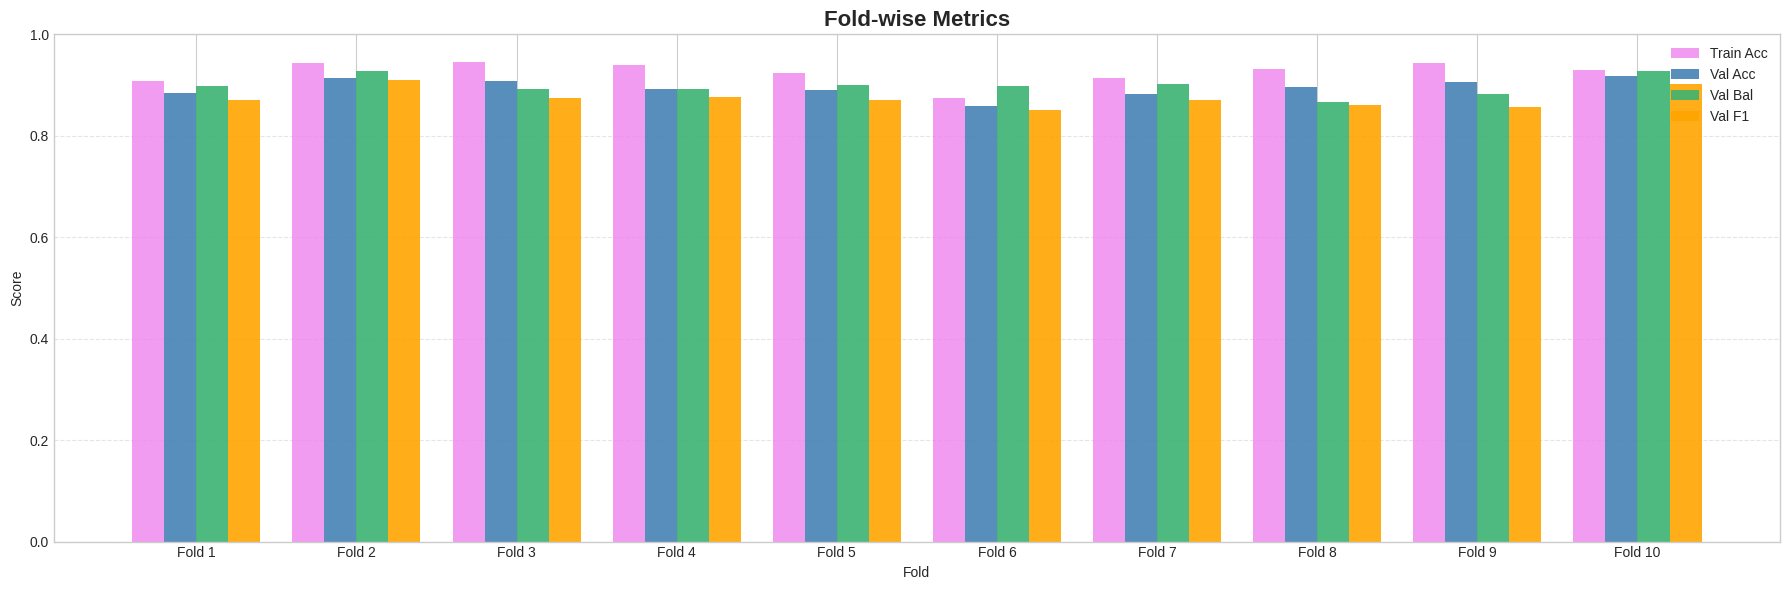

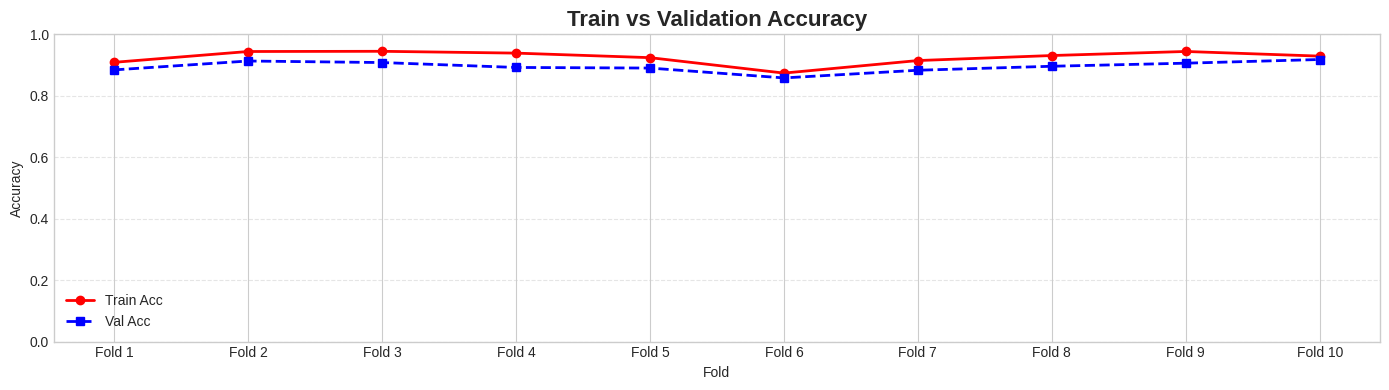

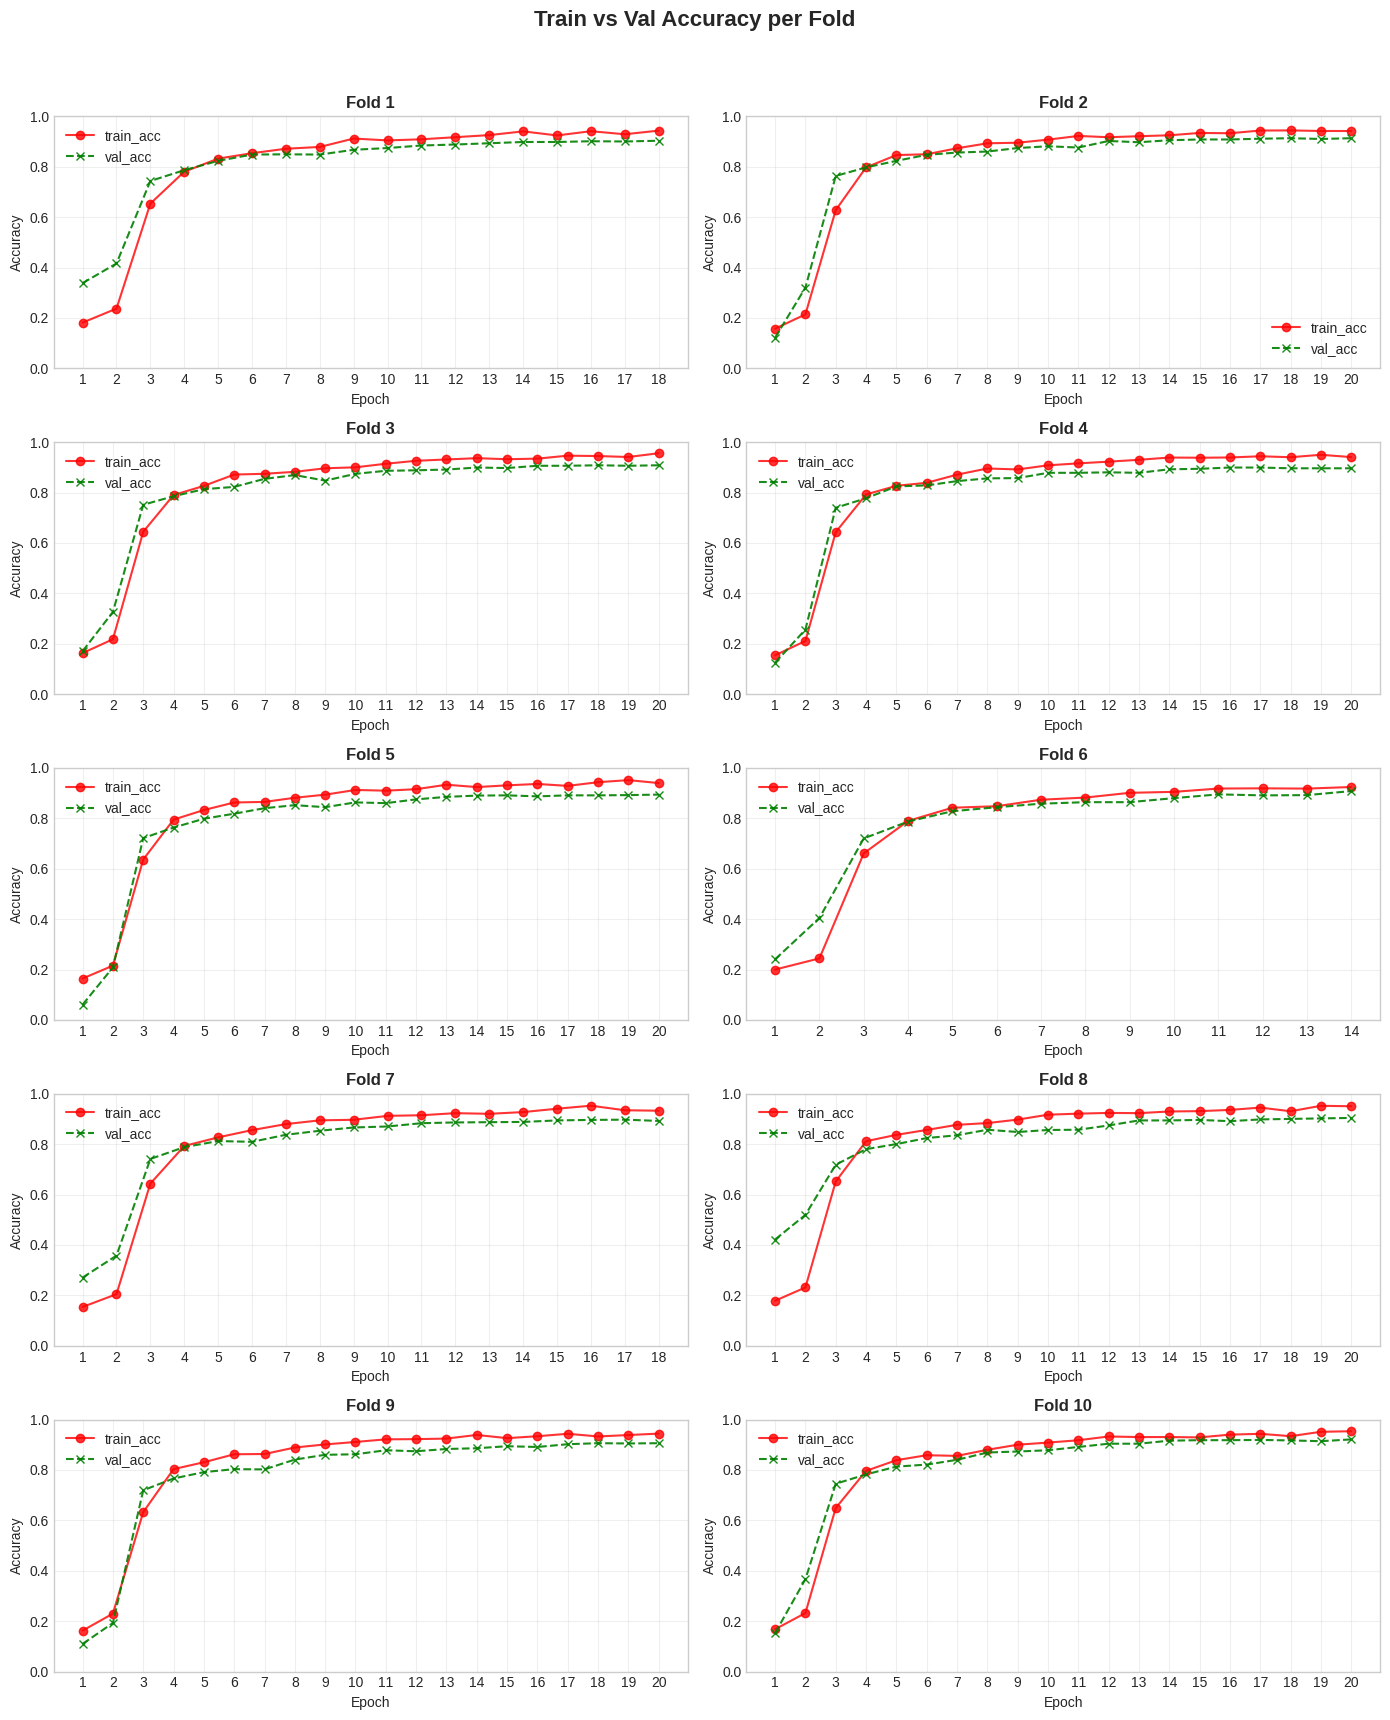


✅ Fold-wise visualization complete!

🎯 Generating Confusion Matrix & ROC Curves...

🔥 Best Fold: 2  |  Model: output/best_fold2_ema.pth
📐 Architecture: vit_base_patch16_224
📊 Samples: 10015  |  Classes: ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']
✅ Model loaded successfully!



📊 CLASSIFICATION REPORT
              precision    recall  f1-score   support

       AKIEC     0.9728    0.9847    0.9787       327
         BCC     0.9518    0.9981    0.9744       514
         BKL     0.9351    0.9836    0.9588      1099
          DF     0.9746    1.0000    0.9871       115
         MEL     0.8279    0.9811    0.8980      1113
          NV     0.9961    0.9518    0.9735      6705
        VASC     0.9793    1.0000    0.9895       142

    accuracy                         0.9633     10015
   macro avg     0.9482    0.9856    0.9657     10015
weighted avg     0.9672    0.9633    0.9641     10015



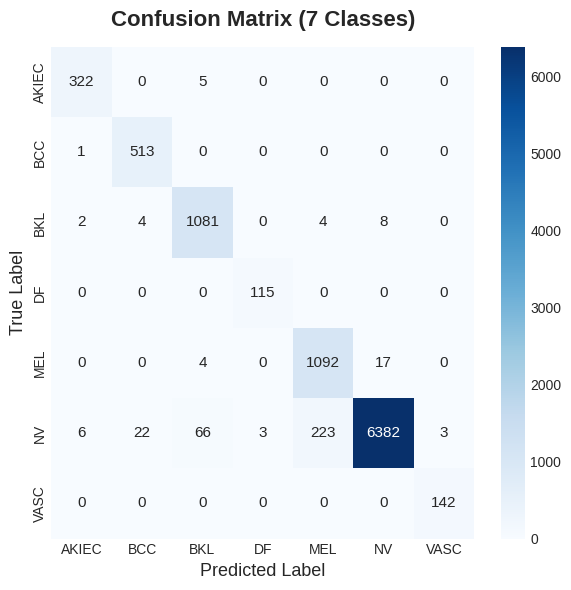

✅ Saved: output/confusion_matrix_7class.png


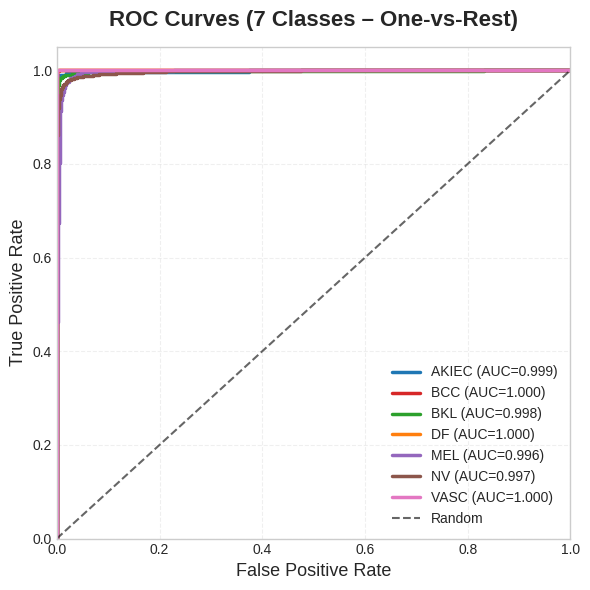

✅ Saved: output/roc_curves_7class.png

🎉 ALL DONE!
📂 Output folder: output/


In [4]:
import pickle, os, warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import timm
warnings.filterwarnings("ignore")

# ============================================================
# PART 1 — FOLD-WISE METRICS
# ============================================================
OUT_DIR  = "output"
pkl_path = os.path.join(OUT_DIR, "fold_results.pkl")

if not os.path.exists(pkl_path):
    raise FileNotFoundError(f"❌ {pkl_path} not found! Run Cell 1 first.")

with open(pkl_path, "rb") as f:
    results = pickle.load(f)

fold_results = results["fold_results"]
NUM_CLASSES  = results.get("num_classes", 7)
CLASS_NAMES  = list(results.get("class_names", ['AKIEC','BCC','BKL','DF','MEL','NV','VASC']))
MODEL_NAME   = results.get("model_name", "vit_base_patch16_224")  # ✅ auto-detect from training

print(f"✅ Loaded results  | classes={NUM_CLASSES} | model={MODEL_NAME}")
print(f"✅ Class names: {CLASS_NAMES}")

# ── Extract metrics ────────────────────────────────────────
folds       = [f.get("fold", i+1) for i, f in enumerate(fold_results)]
train_acc   = [f["best_train_acc"]  for f in fold_results]
train_loss  = [f["best_train_loss"] for f in fold_results]
val_acc     = [f["best_val_acc"]    for f in fold_results]
val_bal     = [f["best_val_bal"]    for f in fold_results]
val_f1      = [f["best_val_f1"]     for f in fold_results]
val_loss    = [f["best_val_loss"]   for f in fold_results]
model_paths = [os.path.basename(f["best_model_path"]) for f in fold_results]

# ── Summary table ─────────────────────────────────────────
df_summary = pd.DataFrame({
    "Fold": folds, "Train_Acc": train_acc, "Train_Loss": train_loss,
    "Val_Acc": val_acc, "Val_Bal": val_bal, "Val_F1": val_f1,
    "Val_Loss": val_loss, "Model": model_paths
})
print("\n📊 Fold-wise Summary:")
display(df_summary)

if "total_energy_kwh" in results:
    print("\n⚡ HARDWARE EFFICIENCY")
    print(f"Total Energy : {results['total_energy_kwh']:.6f} kWh")
    print(f"Total Time   : {results['total_latency_all_folds']:.2f} sec")

best_idx = int(np.argmax(val_bal))
print(f"\n🏆 Best Fold: {folds[best_idx]}  |  Val Bal: {val_bal[best_idx]:.4f}  |  Val Acc: {val_acc[best_idx]:.4f}")

# ── Bar chart ─────────────────────────────────────────────
x, w = np.arange(len(folds)), 0.2
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(x - w*1.5, train_acc, w, label="Train Acc", color="violet",       alpha=0.8)
ax.bar(x - w/2,   val_acc,   w, label="Val Acc",   color="steelblue",    alpha=0.9)
ax.bar(x + w/2,   val_bal,   w, label="Val Bal",   color="mediumseagreen",alpha=0.9)
ax.bar(x + w*1.5, val_f1,    w, label="Val F1",    color="orange",        alpha=0.9)
ax.set_xticks(x); ax.set_xticklabels([f"Fold {i}" for i in folds])
ax.set_ylim(0, 1); ax.set_title("Fold-wise Metrics", fontsize=16, fontweight='bold')
ax.set_xlabel("Fold"); ax.set_ylabel("Score")
ax.grid(axis="y", linestyle='--', alpha=0.5); ax.legend()
plt.tight_layout(); plt.show()

# ── Line chart ────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(x, train_acc, 'o-', color='red',  label='Train Acc', linewidth=2)
ax.plot(x, val_acc,   's--',color='blue', label='Val Acc',   linewidth=2)
ax.set_xticks(x); ax.set_xticklabels([f"Fold {i}" for i in folds])
ax.set_ylim(0, 1); ax.set_title("Train vs Validation Accuracy", fontsize=16, fontweight='bold')
ax.set_xlabel("Fold"); ax.set_ylabel("Accuracy")
ax.grid(axis="y", linestyle='--', alpha=0.5); ax.legend()
plt.tight_layout(); plt.show()

# ── Per-fold epoch curves ──────────────────────────────────
fold_tr, fold_val = defaultdict(list), defaultdict(list)
for i, fold in enumerate(fold_results):
    logs = fold.get("epoch_logs", [])
    fold_tr[i+1]  = [e["train_acc"] for e in logs]
    fold_val[i+1] = [e["val_acc"]   for e in logs]

num_folds = len(fold_results)
rows = (num_folds + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 3.5))
axes = axes.flatten()
for fi in range(1, num_folds + 1):
    ax  = axes[fi - 1]
    eps = range(1, len(fold_tr[fi]) + 1)
    ax.plot(eps, fold_tr[fi],  'o-', color='red',   label='train_acc', alpha=0.8, linewidth=1.5)
    ax.plot(eps, fold_val[fi], 'x--',color='green', label='val_acc',   alpha=0.9, linewidth=1.5)
    ax.set_title(f'Fold {fi}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Epoch'); ax.set_ylabel('Accuracy')
    ax.set_xticks(eps); ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3); ax.legend()
for j in range(num_folds, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Train vs Val Accuracy per Fold", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show()

print("\n" + "="*60)
print("✅ Fold-wise visualization complete!")
print("="*60)

# ============================================================
# PART 2 — CONFUSION MATRIX & ROC CURVES
# ============================================================
print("\n" + "="*60)
print("🎯 Generating Confusion Matrix & ROC Curves...")
print("="*60)

DATA_DIR  = "/kaggle/input/datasets/surajghuwalewala/ham1000-segmentation-and-classification"
IMG_DIR   = os.path.join(DATA_DIR, "images")
META_CSV  = os.path.join(DATA_DIR, "GroundTruth.csv")
IMG_SIZE  = 224
BATCH_SIZE= 32
DEVICE    = "cuda" if torch.cuda.is_available() else "cpu"

# ── Model (uses MODEL_NAME auto-detected from pkl) ─────────
class ViTClassifier(nn.Module):
    def __init__(self, model_name, num_classes):
        super().__init__()
        self.net = timm.create_model(model_name, pretrained=False, num_classes=0)
        self.net.head = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(self.net.num_features, num_classes)
        )
    def forward(self, x): return self.net(x)

# ── Dataset ────────────────────────────────────────────────
class HAM10000Dataset(Dataset):
    def __init__(self, df, transforms=None):
        self.df = df.reset_index(drop=True)
        self.transforms = transforms
    def __len__(self): return len(self.df)
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        try:   img = Image.open(row['image_path']).convert("RGB")
        except:img = Image.new("RGB", (IMG_SIZE, IMG_SIZE))
        img   = np.ascontiguousarray(np.array(img.resize((IMG_SIZE, IMG_SIZE))))
        label = int(row['label_idx'])
        if self.transforms: img = self.transforms(image=img)['image']
        return img, label

def get_test_transforms():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),
        A.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)),
        ToTensorV2()
    ])

# ── Metadata ───────────────────────────────────────────────
def read_metadata(meta_csv):
    df = pd.read_csv(meta_csv)
    label_cols = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC']
    if all(c in df.columns for c in label_cols):
        df['label'] = df[label_cols].idxmax(axis=1)
        img_col = 'image_id' if 'image_id' in df.columns else ('image' if 'image' in df.columns else df.columns[0])
        df = df[[img_col,'label']].rename(columns={img_col:'image'})
    else:
        lc  = 'dx' if 'dx' in df.columns else ('label' if 'label' in df.columns else df.columns[1])
        ic  = 'image_id' if 'image_id' in df.columns else ('image' if 'image' in df.columns else df.columns[0])
        df  = df[[ic,lc]].rename(columns={ic:'image', lc:'label'})
    df['image_path'] = df['image'].apply(
        lambda x: os.path.join(IMG_DIR, str(x)) if str(x).endswith(('.jpg','.png','.jpeg'))
                  else os.path.join(IMG_DIR, f"{x}.jpg"))
    return df

# ── Predictions ────────────────────────────────────────────
@torch.no_grad()
def get_predictions(model, loader, device):
    model.eval()
    all_labels, all_preds, all_probs = [], [], []
    for imgs, labels in tqdm(loader, desc="Predicting", leave=False):
        imgs    = imgs.to(device)
        out     = model(imgs)
        probs   = torch.softmax(out, dim=1)
        all_probs.append(probs.cpu().numpy())
        all_preds.append(out.argmax(1).cpu().numpy())
        all_labels.append(labels.numpy())
    return (np.concatenate(all_labels),
            np.concatenate(all_preds),
            np.concatenate(all_probs))

# ── Confusion matrix ───────────────────────────────────────
def plot_confusion_matrix(y_true, y_pred, class_names, save_path):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                annot_kws={"size": 11}, ax=ax)
    ax.set_title(f'Confusion Matrix ({len(class_names)} Classes)',
                 fontsize=16, fontweight='bold', pad=15)
    ax.set_ylabel('True Label', fontsize=13)
    ax.set_xlabel('Predicted Label', fontsize=13)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {save_path}")

# ── ROC curves ─────────────────────────────────────────────
def plot_roc_curves(y_true, y_probs, class_names, save_path):
    n = len(class_names)
    y_bin = label_binarize(y_true, classes=range(n))
    if n == 2:
        y_bin = np.hstack([1 - y_bin, y_bin])

    colors = ['#1f77b4','#d62728','#2ca02c','#ff7f0e',
              '#9467bd','#8c564b','#e377c2','#7f7f7f']
    fig, ax = plt.subplots(figsize=(6, 6))
    for i in range(n):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_probs[:, i])
        roc_auc     = auc(fpr, tpr)
        ax.plot(fpr, tpr, color=colors[i % len(colors)], lw=2.5,
                label=f'{class_names[i]} (AUC={roc_auc:.3f})')
    ax.plot([0,1],[0,1],'k--', lw=1.5, alpha=0.6, label='Random')
    ax.set_xlim([0,1]); ax.set_ylim([0,1.05])
    ax.set_xlabel('False Positive Rate', fontsize=13)
    ax.set_ylabel('True Positive Rate',  fontsize=13)
    ax.set_title(f'ROC Curves ({n} Classes – One-vs-Rest)',
                 fontsize=16, fontweight='bold', pad=15)
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {save_path}")

# ── Run ────────────────────────────────────────────────────
from tqdm import tqdm

best_fold_idx   = results["best_fold_idx"]
best_model_file = os.path.basename(results["best_model_path"])
best_model_path = os.path.join(OUT_DIR, best_model_file)

if not os.path.exists(best_model_path):
    print(f"❌ Model not found: {best_model_path}")
else:
    print(f"\n🔥 Best Fold: {best_fold_idx}  |  Model: {best_model_path}")
    print(f"📐 Architecture: {MODEL_NAME}")

    # Load data
    df = read_metadata(META_CSV)
    labels_sorted = sorted(df['label'].unique())
    df['label_idx'] = df['label'].map({k: i for i, k in enumerate(labels_sorted)})
    print(f"📊 Samples: {len(df)}  |  Classes: {labels_sorted}")

    loader = DataLoader(
        HAM10000Dataset(df, get_test_transforms()),
        batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

    # ✅ Use MODEL_NAME from pickle — no mismatch!
    model = ViTClassifier(model_name=MODEL_NAME, num_classes=NUM_CLASSES).to(DEVICE)
    state = torch.load(best_model_path, map_location=DEVICE)
    model.load_state_dict(state)
    print("✅ Model loaded successfully!")

    y_true, y_pred, y_probs = get_predictions(model, loader, DEVICE)

    # Classification report
    print("\n" + "="*60)
    print(f"📊 CLASSIFICATION REPORT")
    print("="*60)
    print(classification_report(y_true, y_pred, target_names=CLASS_NAMES, digits=4))

    # Plots
    plot_confusion_matrix(y_true, y_pred, CLASS_NAMES,
                          os.path.join(OUT_DIR, f"confusion_matrix_{NUM_CLASSES}class.png"))

    plot_roc_curves(y_true, y_probs, CLASS_NAMES,
                    os.path.join(OUT_DIR, f"roc_curves_{NUM_CLASSES}class.png"))

    print("\n" + "="*60)
    print("🎉 ALL DONE!")
    print(f"📂 Output folder: {OUT_DIR}/")
    print("="*60)